In [1]:
from resolved_pol import ResolvedPol

In [2]:
object = "W0831+0140"
band = "R_SPECIAL"
mjds = [60290, 60291, "All"]
#mjds = ["All"]

#Star far from target, only used for seeing but not for position offsets. Assume the ones from W0204-0506.
star_ex_ref = 1010
star_ey_ref = 404

#We'll use the source itself for pointing offsets. 
source_ex_ref =  1021.5
source_ey_ref = 70.5

In [3]:
rpos = list()
for mjd in mjds:
    rpo = ResolvedPol(object=object, band=band, mjd=mjd)
    rpo.find_shift(ex_ref=source_ex_ref, ey_ref=source_ey_ref)
    print(rpo.dx_use, rpo.dy_use)

    rpo.find_seeing(ex_ref=star_ex_ref, ey_ref=star_ey_ref, stddev_0=1.1, show_plots=False)
    print(rpo.seeing)

    rpo.get_pol(regularize_psf=True)

    rpos.append(rpo)

mkdir: stamps: File exists


-0.1 -90.6
[0.77266326 0.77089365 0.82799124 0.73361206 0.78734914 0.74978579
 0.75946425 0.8745222 ]
Target FWHM:  0.9
0.7777192557657395 0.19598525245296636


Target FWHM:  0.9
0.7826902742648196 0.19723794911473455


Target FWHM:  0.9
0.5944360988293841 0.14979789690500478


Target FWHM:  0.9
0.8785715314630113 0.22140002592867883


Target FWHM:  0.9
0.7347024148206225 0.18514500853479687


Target FWHM:  0.9
0.8389015990030882 0.21140320294877823


Target FWHM:  0.9
0.81380264673356 0.2050782669768571


Target FWHM:  0.9
0.35831372527235045 0.09029505876863231


/Users/rjassef/Impol_Blue_HotDOGs/Impol_BHDs_repo/W0204-0506_resolved/resolved_pol.py:194: RuntimeWarning: invalid value encountered in divide
  F = (fo-fe)/(fo+fe)
mkdir: stamps: File exists


-0.1 -90.6
[0.59336997 0.62007046 0.60628744 0.61161326 0.63326682 0.69335461
 0.68255216 0.71188534]
Target FWHM:  0.8
0.9042149301607187 0.2278621624005011


Target FWHM:  0.8
0.8518201608012586 0.21465868052191717


Target FWHM:  0.8
0.8795442166620794 0.22164514259884402


Target FWHM:  0.8
0.8690099792243916 0.21899051476454667


Target FWHM:  0.8
0.8237895450906911 0.20759496536285416


Target FWHM:  0.8
0.6725030502696937 0.16947076866796282


Target FWHM:  0.8
0.7031844156053855 0.17720247273255715


Target FWHM:  0.8
0.6150710014022408 0.1549978923533647


/Users/rjassef/Impol_Blue_HotDOGs/Impol_BHDs_repo/W0204-0506_resolved/resolved_pol.py:194: RuntimeWarning: invalid value encountered in divide
  F = (fo-fe)/(fo+fe)
mkdir: stamps: File exists


-0.1 -90.6
[0.77266326 0.77089365 0.82799124 0.73361206 0.78734914 0.74978579
 0.75946425 0.8745222  0.59336997 0.62007046 0.60628744 0.61161326
 0.63326682 0.69335461 0.68255216 0.71188534]
Target FWHM:  0.9
0.7777192557657395 0.19598525245296636


Target FWHM:  0.9
0.7826902742648196 0.19723794911473455


Target FWHM:  0.9
0.5944360988293841 0.14979789690500478


Target FWHM:  0.9
0.8785715314630113 0.22140002592867883


Target FWHM:  0.9
0.7347024148206225 0.18514500853479687


Target FWHM:  0.9
0.8389015990030882 0.21140320294877823


Target FWHM:  0.9
0.81380264673356 0.2050782669768571


Target FWHM:  0.9
0.35831372527235045 0.09029505876863231


Target FWHM:  0.9
1.1403358616260606 0.2873646371297673


Target FWHM:  0.9
1.09925375766125 0.277011946930635


Target FWHM:  0.9
1.1208743312470881 0.2824603314742662


Target FWHM:  0.9
1.1126273326574687 0.2803820878296821


Target FWHM:  0.9
1.0776782692369853 0.2715749238477203


Target FWHM:  0.9
0.9669651441530549 0.24367521632656983


Target FWHM:  0.9
0.9885492196826537 0.24911440336002874


Target FWHM:  0.9
0.9279405014066643 0.2338410063544794


/Users/rjassef/Impol_Blue_HotDOGs/Impol_BHDs_repo/W0204-0506_resolved/resolved_pol.py:194: RuntimeWarning: invalid value encountered in divide
  F = (fo-fe)/(fo+fe)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ZScaleInterval, LinearStretch, ImageNormalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

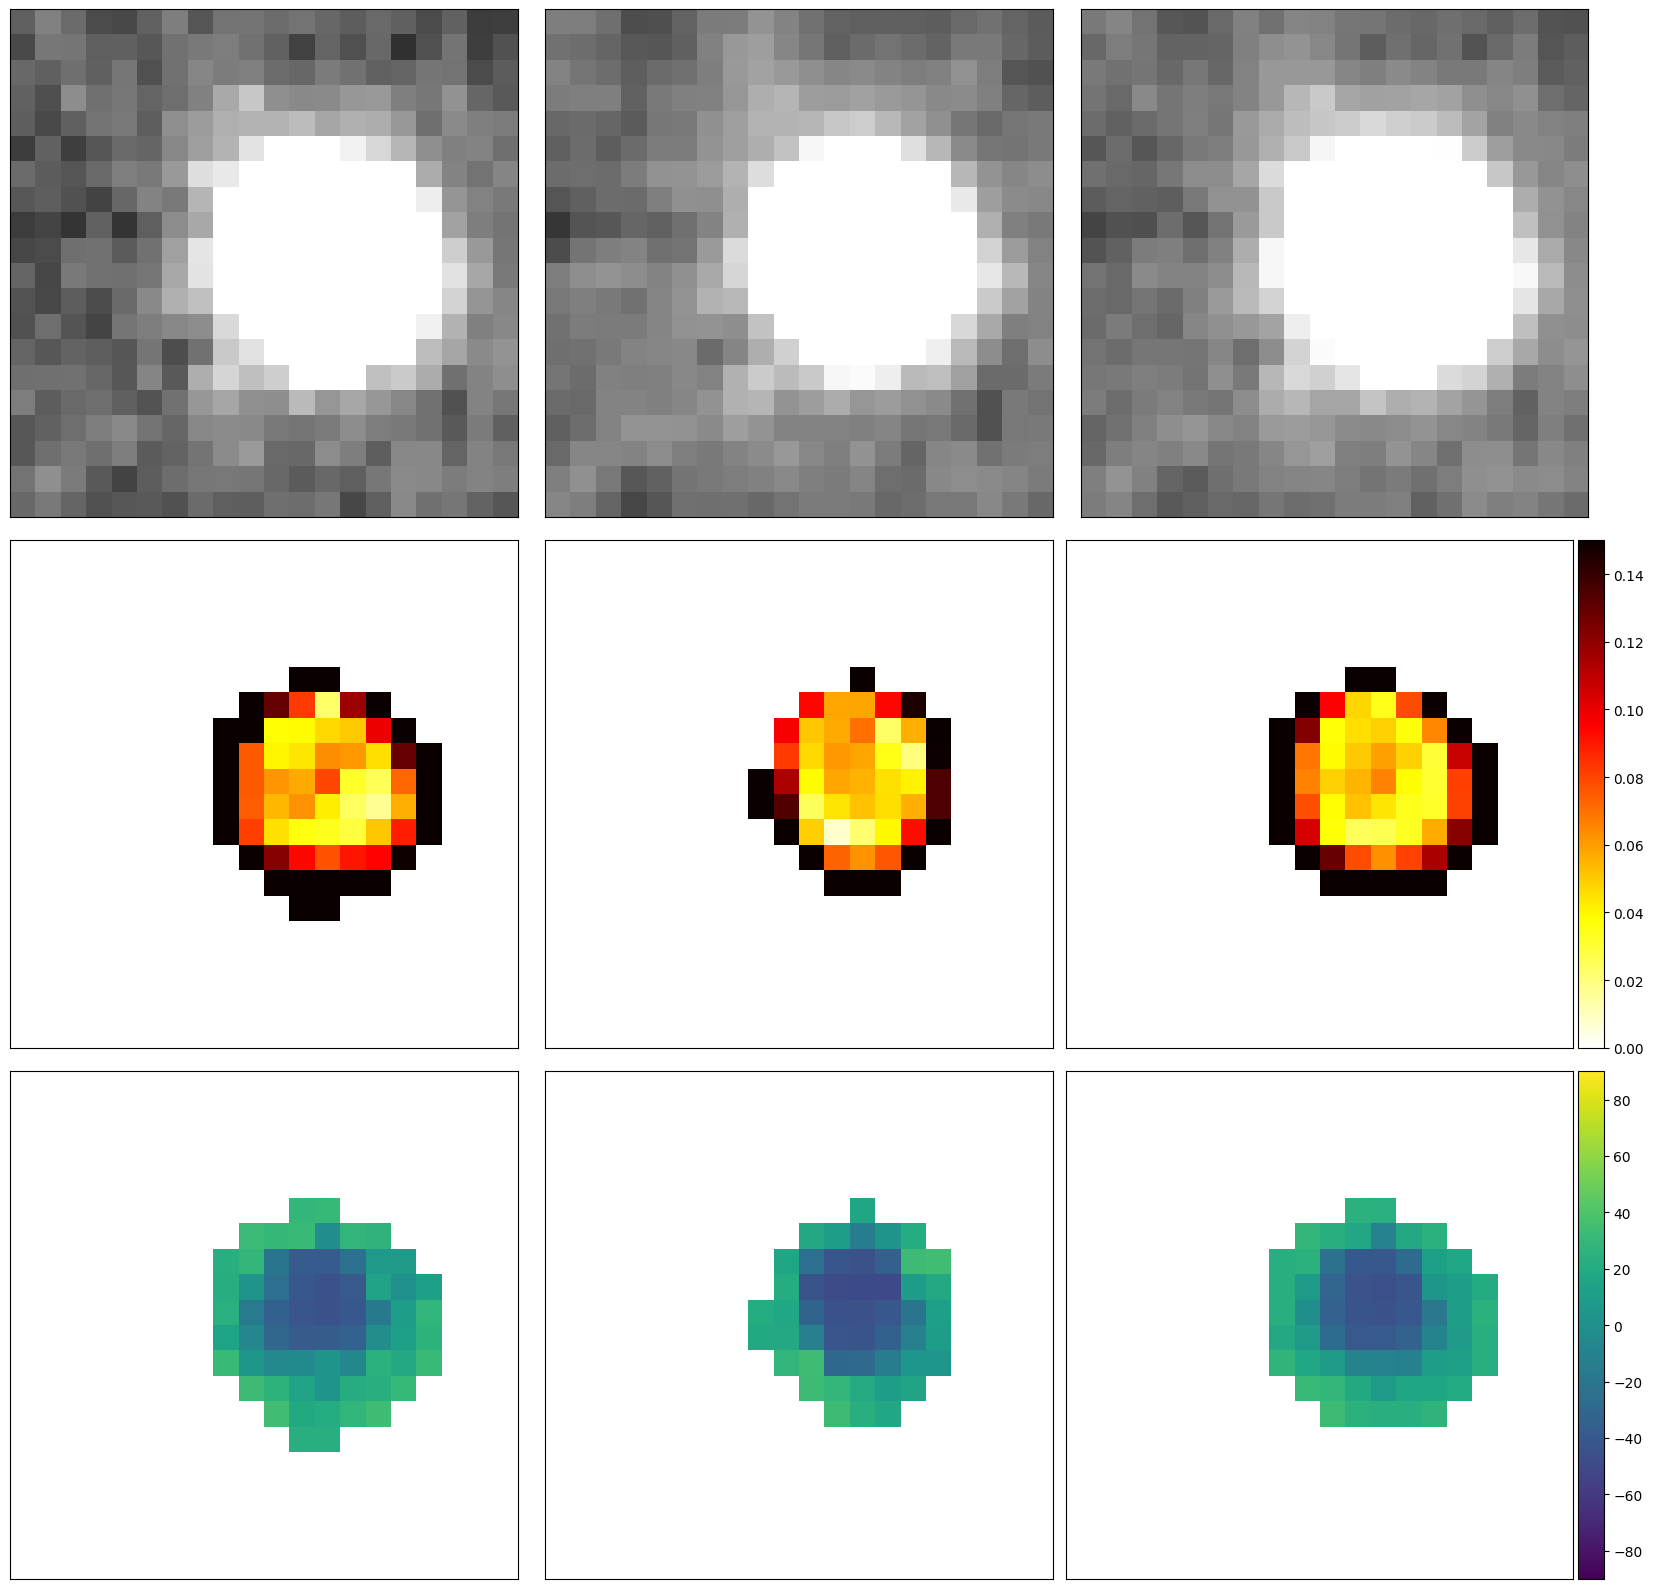

In [7]:
fig, axs = plt.subplots(3,3,figsize=(17,16), sharex=True, sharey=True)
#plt.subplots_adjust(hspace=0., wspace=0.)
plt.subplots_adjust(wspace=0.)
for ax in axs.flat:
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_xticks([])


stack1 = rpos[0].stack[1]
size = 20
ix1 = int(rpos[0].stack.shape[1]/2 - size/2)
ix2 = int(rpos[0].stack.shape[1]/2 + size/2)
iy1 = int(rpos[0].stack.shape[0]/2 + size/2)
iy2 = int(rpos[0].stack.shape[0]/2 - size/2)
#print(ix1, ix2, iy1, iy2)

norm1 = ImageNormalize(rpos[0].stack, stretch=LinearStretch(), interval=ZScaleInterval())
axs[0,0].imshow(rpos[0].stack[iy1:iy2:-1,ix1:ix2], norm=norm1, cmap='gray')

norm2 = ImageNormalize(rpos[1].stack, stretch=LinearStretch(), interval=ZScaleInterval())
axs[0,1].imshow(rpos[1].stack[iy1:iy2:-1,ix1:ix2], norm=norm2, cmap='gray')

norm3 = ImageNormalize(rpos[2].stack, stretch=LinearStretch(), interval=ZScaleInterval())
axs[0,2].imshow(rpos[2].stack[iy1:iy2:-1,ix1:ix2], norm=norm3, cmap='gray')

axs[1,0].imshow(rpos[0].pol_frac[iy1:iy2:-1,ix1:ix2], cmap='hot_r', vmin=0.0, vmax=0.15)
axs[1,1].imshow(rpos[1].pol_frac[iy1:iy2:-1,ix1:ix2], cmap='hot_r', vmin=0.0, vmax=0.15)
cm_pf = axs[1,2].imshow(rpos[2].pol_frac[iy1:iy2:-1,ix1:ix2], cmap='hot_r', vmin=0.0, vmax=0.15)
divider_pf = make_axes_locatable(axs[1,2])
cax_pf = divider_pf.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cm_pf, cax=cax_pf)

axs[2,0].imshow(rpos[0].pol_angle[iy1:iy2:-1,ix1:ix2], cmap='viridis', vmin=-90, vmax=90)
axs[2,1].imshow(rpos[1].pol_angle[iy1:iy2:-1,ix1:ix2], cmap='viridis', vmin=-90, vmax=90)
cm_pa = axs[2,2].imshow(rpos[2].pol_angle[iy1:iy2:-1,ix1:ix2], cmap='viridis', vmin=-90, vmax=90)
divider_pa = make_axes_locatable(axs[2,2])
cax_pa = divider_pa.append_axes("right", size="5%", pad=0.05)
fig.colorbar(cm_pa, cax=cax_pa)

fig.tight_layout()
plt.show()